In [0]:
import numpy as np
import pandas as pd
import fasttext
import nltk
import re
from nltk.stem import WordNetLemmatizer

In [0]:
train = pd.read_csv('products_sentiment_train.tsv', names=['text', 'label'], header=0, sep='\t')
test = pd.read_csv('products_sentiment_test.tsv', header=0, sep='\t', index_col='Id')

In [3]:
print(train.shape)
print(test.shape)

(1999, 2)
(500, 1)


In [4]:
train.head()

,text,label
0,i downloaded a trial version of computer assoc...,1
1,the wrt54g plus the hga7t is a perfect solutio...,1
2,i dont especially like how music files are uns...,0
3,i was using the cheapie pail ... and it worked...,1
4,"you can manage your profile , change the contr...",1


In [5]:
train.isna().sum()

text     0
label    0
dtype: int64

In [0]:
stemmer = WordNetLemmatizer()

def preprocess_text(document):
#         # Remove all the special characters
#         document = re.sub(r'\W', ' ', str(document))

#         # remove all single characters
#         document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

#         # Remove single characters from the start
#         document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)

#         # Substituting multiple spaces with single space
#         document = re.sub(r'\s+', ' ', document, flags=re.I)

#         # Removing prefixed 'b'
#         document = re.sub(r'^b\s+', '', document)

        # Converting to Lowercase
        document = document.strip().lower()

        # Lemmatization
        tokens = document.split()
        tokens = [stemmer.lemmatize(word) for word in tokens]

        preprocessed_text = ' '.join(tokens)

        return preprocessed_text

In [0]:
train['ft'] = train.apply(lambda x: '__label__' + str(x['label']) + ' ' + x['text'], axis=1)
ft = train['ft']

txt = ft.to_list()
txt = '\n'.join(txt)
with open('ftext.txt', 'w') as f:
    f.write(txt)

In [0]:
model = fasttext.train_supervised(input='ftext.txt', lr=0.3, wordNgrams=3, bucket=200000, dim=200)

In [9]:
test.head()

,text
Id,
0,"so , why the small digital elph , rather than ..."
1,3/4 way through the first disk we played on it...
2,better for the zen micro is outlook compatibil...
3,6 . play gameboy color games on it with goboy .
4,"likewise , i 've heard norton 2004 professiona..."


In [10]:
submission= pd.read_csv('products_sentiment_test.tsv', header=0, sep='\t', index_col='Id')
submission.head()

,text
Id,
0,"so , why the small digital elph , rather than ..."
1,3/4 way through the first disk we played on it...
2,better for the zen micro is outlook compatibil...
3,6 . play gameboy color games on it with goboy .
4,"likewise , i 've heard norton 2004 professiona..."


In [11]:
submission['y'] = [model.predict(test.text[i]) for i in submission.index]
submission['y'] = submission['y'].apply(lambda x: int(list(x[0])[0].replace('__label__', '')))
submission.drop(['text'], axis=1, inplace=True)
submission.head()

,y
Id,
0,1
1,0
2,1
3,1
4,1


In [0]:
submission.to_csv('submission.csv')

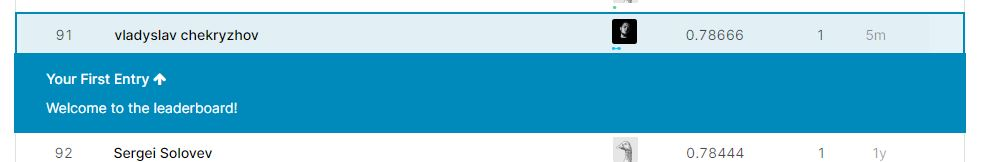

In [13]:

from IPython.display import Image
from IPython.core.display import HTML
Image('/content/2222.JPG')